In [22]:
# Add libraries here
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [23]:
#create variables to debug code
STEP1_DEBUG = 0
STEP2_DEBUG = 0
STEP3_DEBUG = 0
STEP4_DEBUG = 0
STEP5_DEBUG = 0
STEP6_DEBUG = 1
STEP7_DEBUG = 1
STEP8_DEBUG = 0

In [24]:
# -------------------------------
# Step 1 (may need to change relative location of csv file)
# -------------------------------

Labeled_Data = np.genfromtxt("../data/first_class/labeled_data.csv", delimiter=',')
if STEP1_DEBUG:
    print( Labeled_Data)


In [25]:
# -------------------------------
# Step 2
# -------------------------------

L0_idx=Labeled_Data[:,2]==0
L1_idx=Labeled_Data[:,2]==1

L0=Labeled_Data[L0_idx,0:2]
L1=Labeled_Data[L1_idx,0:2]

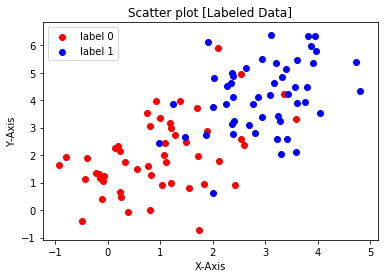

In [26]:
# -------------------------------
# Step 3
# -------------------------------

plt.figure()
plt.title( "Scatter plot [Labeled Data]")
plt.xlabel( "X-Axis" )
plt.ylabel( "Y-Axis" )
plt.scatter( L0[:,0], L0[:,1], color='red', marker='o', label="label 0")
plt.scatter( L1[:,0], L1[:,1], color='blue', marker='o', label="label 1")
plt.legend()
plt.show()

-------------
[[ 0.77442   1.5899  ]
 [ 3.7989    4.4622  ]
 [ 2.2764    4.4967  ]
 [-0.49159  -0.40881 ]
 [-0.42238   1.1165  ]
 [ 3.3505    4.2222  ]
 [ 0.97804   2.4484  ]
 [ 2.3428    4.6153  ]
 [ 2.2629    3.8699  ]
 [ 1.8813    2.7374  ]
 [ 1.1873    3.1864  ]
 [ 3.0923    4.1962  ]
 [ 0.91751   3.9788  ]
 [ 3.5954    2.1299  ]
 [ 2.1174    1.7795  ]
 [ 0.80758  -0.013185]
 [ 0.19553   2.329   ]
 [ 1.479     2.668   ]
 [-0.93302   1.6512  ]
 [ 0.23515   2.1353  ]
 [ 0.56103   1.5031  ]
 [ 3.8671    5.9821  ]
 [ 2.3961    4.1179  ]
 [ 1.9201    6.1103  ]
 [ 4.7298    5.3919  ]
 [-0.40227   1.8964  ]
 [ 1.7481   -0.70809 ]
 [ 1.8886    2.8855  ]
 [ 3.5855    3.3232  ]
 [-0.16584   1.3273  ]
 [ 2.1006    5.8919  ]
 [ 1.2157    2.9811  ]
 [ 0.82262   1.2814  ]
 [ 3.2296    2.5862  ]
 [ 3.9421    6.3441  ]
 [ 3.4013    5.1345  ]
 [ 2.6925    3.0828  ]
 [ 3.3005    2.0277  ]
 [ 3.9105    5.3587  ]
 [ 2.013     0.6048  ]
 [ 2.3914    4.8651  ]
 [-0.061582  1.2357  ]
 [ 3.1992    5.3576 

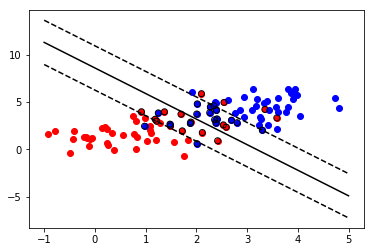

In [29]:
X=Labeled_Data[:,0:2]
Y=Labeled_Data[:,2]
print('-------------')
print(X)
print('-------------')
print(Y)
print('-------------')

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


print( clf.intercept_[0] )

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter( L0[:,0], L0[:,1], color='red', marker='o', label="label 0")
plt.scatter( L1[:,0], L1[:,1], color='blue', marker='o', label="label 1")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], marker='o',
                facecolors='none', edgecolors='black')
plt.show()

In [28]:
Yhat=clf.predict( X )

yhat = np.zeros( ( 1, np.size(Y,0) ) )

for i in range( 0, np.size(Y,0) ):
    if ( np.matmul( np.transpose(w), X[i,:] ) + clf.intercept_ ) > 0:
        yhat[0,i] = 1

print( yhat[0] )
print( Yhat )

[0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1.]
[0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1.]
